# 💸 Prêt bancaire

Vous devez créer un outil à destination des banquiers qui doivent gérer l'attribution des prêts. Evidemment, le Crédit Simplonien s'attend à un outil extrêment efficace avec un forte précision et un risque d'erreur proche de 0.

Le banquier n'est pas un expert Data, mais il devra être capable de justifier les résultats de l'outil que vous lui mettrez à disposition grâce notamment au document synthétique explicatif.

**Les données :**
- Loan_ID: Unique Loan ID
- Gender: Male/ Female
- Married: Applicant married (Y/N)
- Dependents: Number of dependents
- Education: Applicant Education (Graduate/ Under Graduate)
- Self_Employed: Self employed (Y/N)
- ApplicantIncome: Applicant income
- CoapplicantIncome: Coapplicant income
- LoanAmount: Loan amount in thousands
- Loan_Amount_Term: Term of loan in months
- Credit_History: credit history meets guidelines
- Property_Area: Urban/ Semi Urban/ Rural
- Loan_Status : Loan approved (Y/N)

# 📜 Sommaire

- EDA
- Preprocessing
- Modèle

# 📊 EDA

In [315]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTEENN

# metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import datasets, linear_model, metrics

# models
from tpot import TPOTClassifier


import warnings
warnings.filterwarnings('ignore')

In [249]:
# Display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [317]:
# load data
train = pd.read_csv('data/train.txt')
test = pd.read_csv('data/test.txt')

# view dataframe
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [259]:
def all_info(df):
    print("-------------Top-5--------------")
    print(df.head())
    print()
    print("-----------Information-----------")
    print(df.info())
    print()
    print("-----------Data Types-----------")
    print(df.dtypes)
    print()
    print("----------Missing value-----------")
    print(df.isnull().sum().sum())
    print()
    print("----------Null value-----------")
    print(df.isna().sum())
    print()
    print("----------Shape of Data----------")
    print(df.shape)
    print("----------Duplicate----------")
    print(df.duplicated().sum())

In [260]:
# view all infos of data
all_info(train)

-------------Top-5--------------
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural  

In [261]:
#get numerical and categorical col
numeric_col=[col for col in train if train[col].dtype !="object" ]
categorical_col=[col for col in train if train[col].dtype=="object" ]
print("Numerical col:",numeric_col)
print("Categorical col:",categorical_col)

Numerical col: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
Categorical col: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


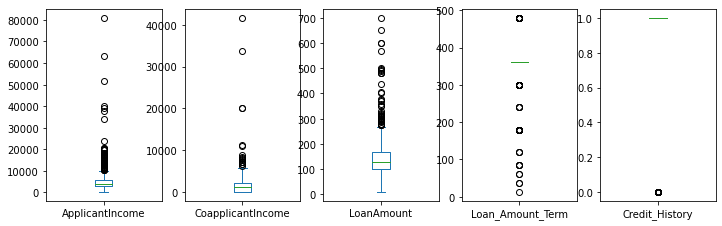

In [236]:
#individual boxplot
train.plot(kind='box', subplots=True, layout=(3, 5), figsize=(12, 12));

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

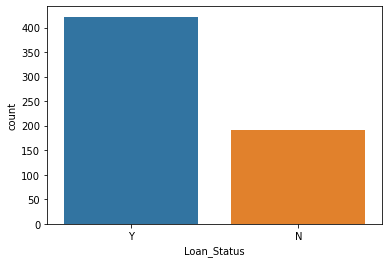

In [237]:
# countplot
sns.countplot(train['Loan_Status'], label='Count')

In [262]:
# value counts on Loan_Status
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [269]:
# value counts on Loan_Status
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:xlabel='Gender', ylabel='count'>

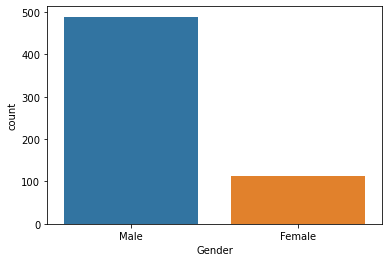

In [238]:
# countplot
sns.countplot(train['Gender'], label='Count')

In [270]:
# value counts
train['Gender'].value_counts(normalize=True)

Male      0.813644
Female    0.186356
Name: Gender, dtype: float64

<AxesSubplot:xlabel='Married', ylabel='count'>

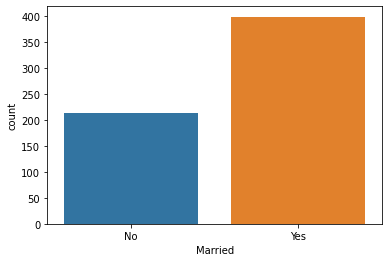

In [239]:
# countplot
sns.countplot(train['Married'], label='Count')

In [272]:
# value counts
train['Married'].value_counts(normalize=True)

Yes    0.651391
No     0.348609
Name: Married, dtype: float64

<AxesSubplot:xlabel='Dependents', ylabel='count'>

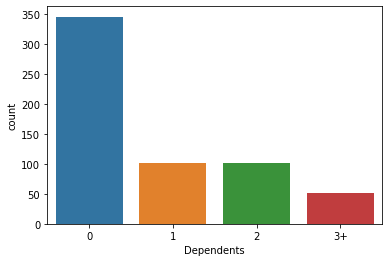

In [243]:
# countplot
sns.countplot(train['Dependents'], label='Count')

<AxesSubplot:xlabel='Education', ylabel='count'>

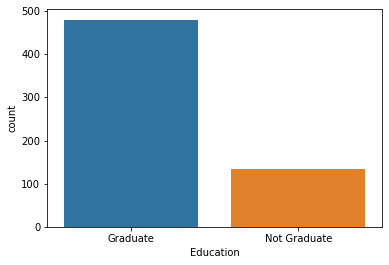

In [244]:
# countplot
sns.countplot(train['Education'], label='Count')

In [266]:
# value counts
train['Education'].value_counts(normalize=True)

Graduate        0.781759
Not Graduate    0.218241
Name: Education, dtype: float64

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

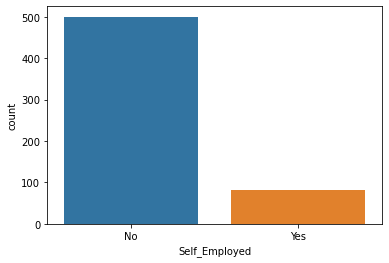

In [245]:
# countplot
sns.countplot(train['Self_Employed'], label='Count')

In [268]:
# value counts
train['Self_Employed'].value_counts(normalize=True)

No     0.859107
Yes    0.140893
Name: Self_Employed, dtype: float64

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

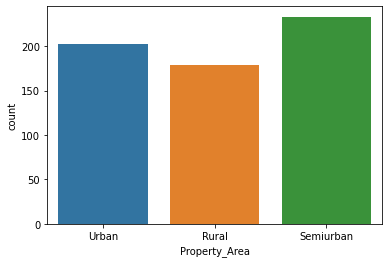

In [246]:
# countplot
sns.countplot(train['Property_Area'], label='Count')

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

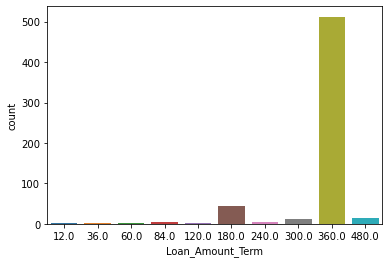

In [275]:
# countplot
sns.countplot(train['Loan_Amount_Term'], label='Count')

**Les données**
- Target : 'Loan_Status'
- Colonne numérique : 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History'
- Colonne catégorique : 'Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status'
- 149 Valeurs manquantes / NaN
- Pas de valeurs dupliquées
- Outliers présents dans les colonnes 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'

**Observations**
- Dataset (train) déséquilibré : la target 'Loan Status' contient 68% de YES et 31% de NO
- Genre : 81% d'hommes / 19% de femmes
- Personnes diplômées : 78%
- Personnes à leur compte : 85%
- Nombre de personnes à charge : majoritairement 0
- Statut marital : 65% de personnes mariées
- Durée de la montant du prêt en mois : majoritairement 360, soit 30 ans

# 🔧 Preprocessing

- Suppression de la colonne Loan_ID
- Encoding des colonnes catégoricals
- Remplacer les NaN par 0
- Split les données / Définir X & y
- Scaler avec RobustScaler en raison des outliers importants
- Utiliser SMOTE ENN pour rééquilibrer les données

In [277]:
# remove unused column
train.drop(['Loan_ID'], axis=1, inplace=True)

In [278]:
# encoding
train['Loan_Status'] = train['Loan_Status'].apply(lambda x: 0 if x=='N' else 1)
train['Self_Employed'] = train['Self_Employed'].apply(lambda x: 0 if x=='No' else 1)
train['Married'] = train['Married'].apply(lambda x: 0 if x=='No' else 1)
train['Gender'] = train['Gender'].apply(lambda x: 0 if x=='Female' else 1)
train['Education'] = train['Education'].apply(lambda x: 0 if x=='Not Graduate' else 1)

In [279]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,NaN,360.0,1.0,Urban,1
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,Urban,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,Urban,1


In [280]:
# replace NaN by 0 on entire dataframe
train = train.fillna(0)

In [282]:
# encoding / get dummies
train = pd.get_dummies(data=train,columns=['Property_Area','Dependents'])

In [283]:
train.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents_0,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
0,1,0,1,0,5849,0.0,0.0,360.0,1.0,1,0,0,1,0,1,0,0,0
1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,1,0,0,0,0,1,0,0
2,1,1,1,1,3000,0.0,66.0,360.0,1.0,1,0,0,1,0,1,0,0,0
3,1,1,0,0,2583,2358.0,120.0,360.0,1.0,1,0,0,1,0,1,0,0,0
4,1,0,1,0,6000,0.0,141.0,360.0,1.0,1,0,0,1,0,1,0,0,0


In [299]:
# define X & y
X = train.drop(columns='Loan_Status')
y = train['Loan_Status']

In [300]:
# scaling
X_std = RobustScaler().fit_transform(X)

In [301]:
# split
X_train, X_test, y_train, y_test = train_test_split(X_std,y,test_size=0.3)

In [302]:
# smote
smt = SMOTEENN(random_state=42)

X_train_smt, y_train_smt = smt.fit_resample(X_train, y_train)

# concat in new dataframe
df_smt = pd.concat([pd.DataFrame(y_train_smt), pd.DataFrame(X_train_smt)], axis=1)

In [303]:
# value count after SMOTE
df_smt['Loan_Status'].value_counts()

0    167
1    124
Name: Loan_Status, dtype: int64

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

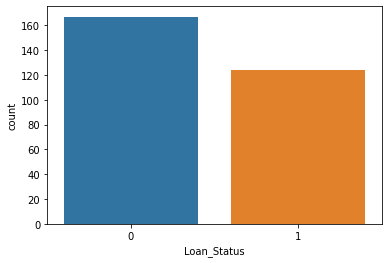

In [304]:
# countplot after SMOTE
sns.countplot(df_smt['Loan_Status'], label='Count') 

# 🎯 Model

In [305]:
# TPOT setup
GENERATIONS = 5
POP_SIZE = 50

tpot = TPOTClassifier(
    generations=GENERATIONS,
    population_size=POP_SIZE,
    verbosity=2,
)

tpot.fit(X_train_smt, y_train_smt)

preds = tpot.predict(X_test)
print(accuracy_score(y_test, preds))

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9177089421390999

Generation 2 - Current best internal CV score: 0.9381063705435417

Generation 3 - Current best internal CV score: 0.945061367621274

Generation 4 - Current best internal CV score: 0.9450613676212741

Generation 5 - Current best internal CV score: 0.9484511981297488

Best pipeline: KNeighborsClassifier(input_matrix, n_neighbors=3, p=1, weights=distance)
0.6432432432432432


In [306]:
# score (precision, accuracy, recall, F1)
class_report = classification_report(y_test, preds)
conf_matrix = confusion_matrix(y_test,preds)
acc = accuracy_score(y_test,preds)

print("Classification report:\n\n", class_report)
print("Confusion Matrix\n",conf_matrix)
print("\nAccuracy\n",acc)

Classification report:

               precision    recall  f1-score   support

           0       0.47      0.67      0.55        61
           1       0.80      0.63      0.70       124

    accuracy                           0.64       185
   macro avg       0.63      0.65      0.63       185
weighted avg       0.69      0.64      0.65       185

Confusion Matrix
 [[41 20]
 [46 78]]

Accuracy
 0.6432432432432432


<AxesSubplot:>

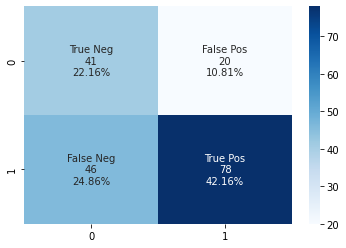

In [312]:
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in conf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues')

**Résultats**
- En utilisant TPOT pour trouver le meilleur modèle, j'obtiens une accuracy de 0.64
- Modèle : KNeighborsClassifier avec un n_neighbors=3
- Score : En recall, 0.67 sur le 0 (donc No sur l'attribuation du prêt) et 0.63 sur le 1 (donc Yes sur l'attribution du prêt).
- Matrice de confusion : 11% de faux positif / 25% de faux négatif
